# <font color=red> Project:  _A Brief Analysis of Liverpool Football Club and Steven Gerrard_
    
<h3 align="center">A comparison of Liverpool to that of their title rivals (Chelsea and Manchester United) and a look at Fifa's evaluation of Steven Gerrard and his midfield rival Frank Lampard of Chelsea from 2007 to 2016</h3>

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This report will examine two aspects of Liverpool Football Club (often referred to as LFC or LIV) and one comparison related to their legendary captain Steven Gerrard over nine seasons, starting in 2007-08 and running to the 2015-2016 season. It is available thanks to Udacity and this <a href="https://www.kaggle.com/hugomathien/soccer"><em>Kaggle Database</em></a>. Coicidentally, the data range available encompasses one of Liverpool's worst periods of the modern era, featuring limited team success, especially for such a historically decorated and respected English club. In fact, their only major trophy was a 2011-12 English Football League Cup (Carling Cup) victory over Cardiff Cup. 

This period saw five different managers take charge of LFC, starting with the twilight of one of the most prolific managers of Liverpool's modern era (<a href="https://en.wikipedia.org/wiki/Rafael_Ben%C3%ADtez"><em>Rafael Benítez</em></a>) and concluding with the dawn of a future Anfield legend's time with the Reds (<a href="https://en.wikipedia.org/wiki/J%C3%BCrgen_Klopp"><em>Jürgen Klopp</em></a>) in the Fall of 2015. These two bookend the horrible 7 months of <a href="https://en.wikipedia.org/wiki/Roy_Hodgson"><em>Roy Hodgson</em></a>, the second attempt as manager for <a href="https://en.wikipedia.org/wiki/Kenny_Dalglish"><em>Kenny Dalglish</em></a> and the somewhat improved results of <a href="https://en.wikipedia.org/wiki/Brendan_Rodgers"><em>Brendan Rodgers</em></a>. Dalglish captured one domestic cup victory and Rodgers had near success in winning the English Premier League(EPL). 

It is hard to not speak of this time period without a negative bias. Fans watched a European Champions League winning squad flounder, held together by Steven Gerrard alone for several years, until a combination of new owner's and Jurgen Klopp righted the ship. Though, how did the club really perform compared to its title rivals? Was it their style of play, their players, or something less tangible? Lastly, was Steven Gearrard rated better or worse than Frank Lampard based on FIFA's data? This report will aim to provide those comparisons in a clear, digestible manner. 

<img src="liverpool-fc.jpg"
alt="Liverpool Logo"
width="200px" height="200px" style="float"/>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from textwrap import wrap 
%matplotlib inline





<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
gerrard_data = pd.read_csv('gerrard_attributes.csv')
lampard_data = pd.read_csv('lampard_attributes.csv')
all_man_u_matches = pd.read_csv('man_u_matches.csv')
all_chel_matches = pd.read_csv('chelsea_matches.csv')
all_liv_matches = pd.read_csv('liverpool_matches.csv')

For the analysis of this giant football database, 5 datasets were collected from the larger kaggle database using SQLite. This was done to focus on the specific questions being posed and to efficiently slim the datasets, as there were almost 300 teams, nearly 26,000 matches and over 11,000 players in the database. Unfortunately, despite the large amount of data available, the database did not appear to include the necessary columns/keys to connect the match/team data to the player data (or at least not easily). That limits the ability to answer some questions which could have been posed regarding coorelations regarding the caliber of the player and their respective clubs performance. 

Match data and player data was selected based on the individual teams and players of interest, rather than selected simultaneously. This means that more data must be read into dataframes and analyzed in the notebook, but ultimately made it much easier to initially wrangle, clean, and explore the data. Also, the initial data was collected from the database with far more information than was ultimately used in the analysis. 

Let's first look at some basic information related to the two types of datafields which are being analyzed. 

In [3]:
print(gerrard_data.shape)
print(all_liv_matches.shape)

(36, 49)
(304, 7)


In [4]:
gerrard_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    36 non-null     int64  
 1   player_api_id         36 non-null     int64  
 2   player_name           36 non-null     object 
 3   player_fifa_api_id    36 non-null     int64  
 4   birthday              36 non-null     object 
 5   height                36 non-null     float64
 6   weight                36 non-null     int64  
 7   id.1                  36 non-null     int64  
 8   player_fifa_api_id.1  36 non-null     int64  
 9   player_api_id.1       36 non-null     int64  
 10  date                  36 non-null     object 
 11  overall_rating        36 non-null     int64  
 12  potential             36 non-null     int64  
 13  preferred_foot        36 non-null     object 
 14  attacking_work_rate   36 non-null     object 
 15  defensive_work_rate   36 

In [5]:
all_liv_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   home_team_goal    304 non-null    int64 
 1   away_team_goal    304 non-null    int64 
 2   away_team_api_id  304 non-null    int64 
 3   home_team_api_id  304 non-null    int64 
 4   home_team         304 non-null    object
 5   season            304 non-null    object
 6   date              304 non-null    object
dtypes: int64(4), object(3)
memory usage: 16.8+ KB


From this information you learn two important facts about the data: 
1. The dataframes have the shape of 36x49 for player data and 304x7 for team match data
2. The dataframes do not have any null values. This also holds true to the three other similar datasets from the other players/teams that were not used as examples. 
3. It should be noted that the column _'home_team'_ in the team datasets was created with a SQL query to display the home team for each match. 

This allows the wrangling phase to focus more on what data is needed to answer the questions posed, as opposed to how to fill in the blanks or drop columns due to insufficent data. 

Though, speaking of dropping columns, the player data for the Gerrard and Lampard datasets were not pulled from the database with a clear idea of the question which was going to be asked. 
``` mysql
SELECT *
FROM player as p
JOIN player_attributes as pa
ON p.player_api_id = pa.player_api_id
WHERE p.player_api_id = (relevant ID nubmer for Gerrard or Lampard)
```
As a result, the datasets have 49 columns, most of which are not relevant to the chosen analysis. These columns could have been dropped, 
``` python
gerrard_data.drop(['crossing', 'short_passing', 'gk_reflexes'...])
```
but it was more efficient to ignore the excess and create new dataframes focused on the information which may actually be used. 

The match/team datasets did not require any wrangling, as there were no nulls and the columns were selected from the dataset with a specific question in mind, but they did have a lot of cleaning ahead of them to help answer the question being posed. 

### Data Cleaning 

#### Player dataset cleaning

The cleaning on the player datasets took place in two steps:

1. Adjust the date element to a datetime value
2. Create the smaller df for each player which contains only the relevant data


Here is step one:

In [6]:
gerrard_data['date'] = pd.to_datetime(gerrard_data['date'], errors='coerce')
lampard_data['date'] = pd.to_datetime(lampard_data['date'], errors='coerce')

_The coercing of errors is to force-clean the data as it is converted using Datetime package._

And here is step two:

In [7]:
gerrard_avg = gerrard_data.groupby([gerrard_data['date'].dt.year])[['overall_rating', 'potential']].mean()
lampard_avg = lampard_data.groupby([lampard_data['date'].dt.year])[['overall_rating', 'potential']].mean()

Step two first grouped the data by year based on the _'date'_ column and then provided the mean (average) of the _'overall_rating'_ and _'potential'_ columns for the new dataframes. The two, new player dataframes have been created and are ready to be used in the analysis.

#### Match/team dataset cleaning

Now, the more intensive data cleaning begins. The match/team data for Liverpool, Chelsea (CFC), and Manchester United (Man U and United) provided a lot of information, but did not include some very data required to answer the question being posed. Almost shockingly, despite including the number of home and away goals in each match, the database did not indicate which team won each game. So, data was pulled form the database which would hopefully be able to be cleaned and analyzed to provide the desired insights.

1. As previously indicated, the database did not have data related to the result (Win, loss, draw/tie) or who won/lost. The first step towards creating this data involved creating a new column which displayed the goal difference of each game

In [8]:
all_liv_matches['goal_difference'] = all_liv_matches['home_team_goal'] - all_liv_matches['away_team_goal']
all_liv_matches.head()

,home_team_goal,away_team_goal,away_team_api_id,home_team_api_id,home_team,season,date,goal_difference
0,0,1,8650,8472,Sunderland,2008/2009,2008-08-16 00:00:00,-1
1,1,0,8462,8650,Liverpool,2008/2009,2008-10-29 00:00:00,1
2,2,1,8650,8586,Tottenham Hotspur,2008/2009,2008-11-01 00:00:00,1
3,3,0,8659,8650,Liverpool,2008/2009,2008-11-08 00:00:00,3
4,0,2,8650,8559,Bolton Wanderers,2008/2009,2008-11-15 00:00:00,-2


In [9]:
all_chel_matches['goal_difference'] = all_chel_matches['home_team_goal'] - all_chel_matches['away_team_goal']
all_man_u_matches['goal_difference'] = all_man_u_matches['home_team_goal'] - all_man_u_matches['away_team_goal']

Okay. The a column now displays the difference in goals for each match. However, this information is only useful if we were only loooking at home matches where a positive goal difference always means a win. That is not the case with this data, so both home and away matches need to be addressed. 

First, let's create two new dataframes of the same data, except one will feature only home matches and the other away matches.

In [10]:
l_home_games = all_liv_matches[all_liv_matches['home_team'] == "Liverpool"].reset_index()
l_home_games.head()

,index,home_team_goal,away_team_goal,away_team_api_id,home_team_api_id,home_team,season,date,goal_difference
0,1,1,0,8462,8650,Liverpool,2008/2009,2008-10-29 00:00:00,1
1,3,3,0,8659,8650,Liverpool,2008/2009,2008-11-08 00:00:00,3
2,5,0,0,9879,8650,Liverpool,2008/2009,2008-11-22 00:00:00,0
3,6,0,0,8654,8650,Liverpool,2008/2009,2008-12-01 00:00:00,0
4,8,2,2,8667,8650,Liverpool,2008/2009,2008-12-13 00:00:00,0


In [11]:
m_home_games = all_man_u_matches[all_man_u_matches['home_team'] == "Manchester United"].reset_index()
c_home_games = all_chel_matches[all_chel_matches['home_team'] == "Chelsea"].reset_index()

In [12]:
l_away_games = all_liv_matches[all_liv_matches['home_team'] != "Liverpool"].reset_index()
l_away_games.head()

,index,home_team_goal,away_team_goal,away_team_api_id,home_team_api_id,home_team,season,date,goal_difference
0,0,0,1,8650,8472,Sunderland,2008/2009,2008-08-16 00:00:00,-1
1,2,2,1,8650,8586,Tottenham Hotspur,2008/2009,2008-11-01 00:00:00,1
2,4,0,2,8650,8559,Bolton Wanderers,2008/2009,2008-11-15 00:00:00,-2
3,7,1,3,8650,8655,Blackburn Rovers,2008/2009,2008-12-06 00:00:00,-2
4,9,1,1,8650,9825,Arsenal,2008/2009,2008-12-21 00:00:00,0


In [13]:
c_away_games = all_chel_matches[all_chel_matches['home_team'] != "Chelsea"].reset_index()
m_away_games = all_man_u_matches[all_man_u_matches['home_team'] != "Manchester United"].reset_index()

Great! The matches have been divided into home and away dataframes. However, there is still no answer as to whether the goal difference indidcates a win. Thankfully, two simple _for loops_ can help provide this information. 

2. Iterate over the _goal_difference_ column, determine the result based on the difference (based on whether the subject team is away or home), and append that information to a new column. For the sake of brevity, we will use two functions.

In [14]:
#wldt_h takes in the home matches df of any team and returns the data frame with a new column indicating whether the match was a win, loss, or draw/tie.
def wldt_h(df):
    h_result = []

    for gd in df['goal_difference']:
        if gd > 0:
            h_result.append('W')
        elif gd < 0:
            h_result.append('L')
        elif gd == 0:
            h_result.append('D/T')

    df['result'] = h_result
    return df

#wldt_a takes in the away matches df of any team and returns the data frame with a new column indicating whether the match was a win, loss, or draw/tie.
def wldt_a(df):
    a_result = []
    for gd in df['goal_difference']:
        if gd > 0:
            a_result.append('L')
        elif gd < 0:
            a_result.append('W')
        elif gd == 0:
            a_result.append('D/T')

    df['result'] = a_result
    return df
        

In [15]:
wldt_h(l_home_games).head()

,index,home_team_goal,away_team_goal,away_team_api_id,home_team_api_id,home_team,season,date,goal_difference,result
0,1,1,0,8462,8650,Liverpool,2008/2009,2008-10-29 00:00:00,1,W
1,3,3,0,8659,8650,Liverpool,2008/2009,2008-11-08 00:00:00,3,W
2,5,0,0,9879,8650,Liverpool,2008/2009,2008-11-22 00:00:00,0,D/T
3,6,0,0,8654,8650,Liverpool,2008/2009,2008-12-01 00:00:00,0,D/T
4,8,2,2,8667,8650,Liverpool,2008/2009,2008-12-13 00:00:00,0,D/T


In [16]:
wldt_a(l_away_games).head()

,index,home_team_goal,away_team_goal,away_team_api_id,home_team_api_id,home_team,season,date,goal_difference,result
0,0,0,1,8650,8472,Sunderland,2008/2009,2008-08-16 00:00:00,-1,W
1,2,2,1,8650,8586,Tottenham Hotspur,2008/2009,2008-11-01 00:00:00,1,L
2,4,0,2,8650,8559,Bolton Wanderers,2008/2009,2008-11-15 00:00:00,-2,W
3,7,1,3,8650,8655,Blackburn Rovers,2008/2009,2008-12-06 00:00:00,-2,W
4,9,1,1,8650,9825,Arsenal,2008/2009,2008-12-21 00:00:00,0,D/T


The dataframes for both away and home liverpool matches now have _l_home_games_ now have a new column indicating whether the match was a W, D/T, or L. 

Let's do the same thing for the Machester United and Chelsea dataframes.

In [17]:
wldt_h(m_home_games)
wldt_a(m_away_games)
wldt_h(c_home_games)
wldt_a(c_away_games).head()

,index,home_team_goal,away_team_goal,away_team_api_id,home_team_api_id,home_team,season,date,goal_difference,result
0,1,0,3,8455,8667,Hull City,2008/2009,2008-10-29 00:00:00,-3,W
1,3,0,2,8455,8655,Blackburn Rovers,2008/2009,2008-11-09 00:00:00,-2,W
2,4,0,3,8455,8659,West Bromwich Albion,2008/2009,2008-11-15 00:00:00,-3,W
3,7,0,2,8455,8559,Bolton Wanderers,2008/2009,2008-12-06 00:00:00,-2,W
4,9,0,0,8455,8668,Everton,2008/2009,2008-12-22 00:00:00,0,D/T


Excellent. The two sub-dataframes for each team's away and home matches now display the results for each team's match. Now, for cleanliness and efficiency sake, the data is merged back into one dataframe with the new column present to indicate the result for every match, away or home.

In [18]:
chelsea_results= pd.concat([c_home_games, c_away_games], axis=0)
manchester_united_results= pd.concat([m_home_games, m_away_games], axis=0)
liverpool_results= pd.concat([l_home_games, l_away_games], axis=0)
liverpool_results.sort_values('date', axis=0).head()

,index,home_team_goal,away_team_goal,away_team_api_id,home_team_api_id,home_team,season,date,goal_difference,result
0,0,0,1,8650,8472,Sunderland,2008/2009,2008-08-16 00:00:00,-1,W
6,11,2,1,8549,8650,Liverpool,2008/2009,2008-08-23 00:00:00,1,W
11,22,0,0,8650,10252,Aston Villa,2008/2009,2008-08-31 00:00:00,0,D/T
16,32,2,1,10260,8650,Liverpool,2008/2009,2008-09-13 00:00:00,1,W
17,33,0,0,10194,8650,Liverpool,2008/2009,2008-09-20 00:00:00,0,D/T


The combined home and away results can now be viewed in one dataframe. Notice that the first two results above, while having two different goal differences are both wins. This is due to Liverpool being the home team in the second match and the away team in the first match. 

The data for each team's matches have now been cleaned, updated to include the result of each match, and added back together. Both datasets are now ready to be used for further analysis.

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Which team performed better over the period of time the database examines(2008/09 to 2015/16?

First, it is important to look at each team's the overall record by season.

In [19]:
liverpool_seasons = pd.crosstab(liverpool_results['season'], liverpool_results['result'])
manchester_united_seasons = pd.crosstab(manchester_united_results['season'], manchester_united_results['result'])
chelsea_seasons = pd.crosstab(chelsea_results['season'], chelsea_results['result'])

The pandas.crosstab ``` pd.crosstab(index, columns,...)``` function was used to quickly cross tabulate the two factors. The rows, or index, were grouped by the _season_ and the column _result_ was grouped by each potential value (W, D/T, and L). Below you will see the record for each team over this 8 season timeframe.

In [20]:
liverpool_seasons

result,D/T,L,W
season,,,
2008/2009,11,2,25
2009/2010,9,11,18
2010/2011,7,14,17
2011/2012,10,14,14
2012/2013,13,9,16
2013/2014,6,6,26
2014/2015,8,12,18
2015/2016,12,10,16


In [21]:
manchester_united_seasons

result,D/T,L,W
season,,,
2008/2009,6,4,28
2009/2010,4,7,27
2010/2011,11,4,23
2011/2012,5,5,28
2012/2013,5,5,28
2013/2014,7,12,19
2014/2015,10,8,20
2015/2016,9,10,19


In [22]:
chelsea_seasons

result,D/T,L,W
season,,,
2008/2009,8,5,25
2009/2010,5,6,27
2010/2011,8,9,21
2011/2012,10,10,18
2012/2013,9,7,22
2013/2014,7,6,25
2014/2015,9,3,26
2015/2016,14,12,12


Now, it is fairly clear from a glance at each team's record that Chelsea and Manchester United outperformed Liverpool, but how consistently? Which of these teams regularly won half or more of their matches each season? To find this answer, groupby is used to group the data by _season_ and then logic is used to determine whether the total wins in that season is equal to or greater than 19 (or half a season). 

In [23]:
liverpool_seasons.groupby('season')['W'].sum() >= 19

season
2008/2009     True
2009/2010    False
2010/2011    False
2011/2012    False
2012/2013    False
2013/2014     True
2014/2015    False
2015/2016    False
Name: W, dtype: bool

In [24]:
chelsea_seasons.groupby('season')['W'].sum() >= 19

season
2008/2009     True
2009/2010     True
2010/2011     True
2011/2012    False
2012/2013     True
2013/2014     True
2014/2015     True
2015/2016    False
Name: W, dtype: bool

In [25]:
manchester_united_seasons.groupby('season')['W'].sum() >= 19

season
2008/2009    True
2009/2010    True
2010/2011    True
2011/2012    True
2012/2013    True
2013/2014    True
2014/2015    True
2015/2016    True
Name: W, dtype: bool

Wow! Over those 8 seasons Liverpool only won 19 or more matches two times! Meanwhile, Chelsea did it 6/8 seasons and United accomplished it every season! The image is clearing up and it does not look good for Liverpool. Though, a visual examination of the number of wins will truly put this information in the proper perspective.

A quick note, one additional cleaning/wrangling step took place in the creation of the following graph. Each team's wins were groupedby the season again and their wins were summed and added into a new dataframe for that team. The wins column from each dataframe was then extracted and added together to create the dataframe _'wins'_,  which is what the bar graph below used for its data.


In [26]:
liverpool_wins = liverpool_seasons.groupby('season')['W'].sum().reset_index()
lfc_wins = liverpool_wins['W']
lfc_wins.name = 'Liverpool Wins'
united_wins = manchester_united_seasons.groupby('season')['W'].sum().reset_index()
man_u_wins = united_wins['W']
man_u_wins.name = 'Manchester United Wins'
chelsea_wins = chelsea_seasons.groupby('season')['W'].sum().reset_index()
cfc_wins = chelsea_wins['W']
cfc_wins.name = 'Chelsea Wins'

wins = pd.concat([lfc_wins, man_u_wins, cfc_wins], axis=1)

The _'wins'_ dataframe is now ready to be turned into a graph, so there is no point in wasting any time!

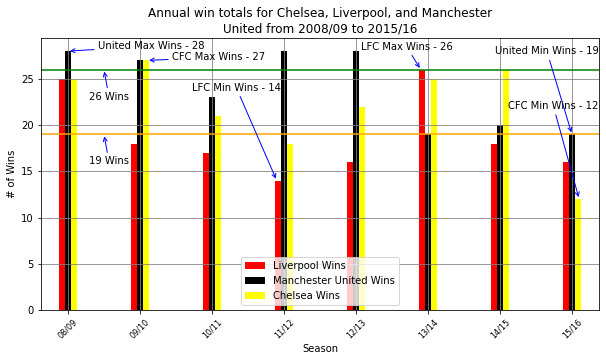

In [27]:
fig, ax = plt.subplots(figsize=(10,5))
width = 0.25
season = ['08/09', '09/10', '10/11', '11/12', '12/13', '13/14', '14/15', '15/16']

title = ax.set_title("\n".join(wrap("Annual win totals for Chelsea, Liverpool, and Manchester United from 2008/09 to 2015/16", 60)))

wins.plot.bar(width=width, ax=ax, color=('red', 'black', 'yellow'), use_index=True).grid(b=True, which='both', axis='both', color='gray')


ax.legend(['Liverpool Wins', 'Manchester United Wins', 'Chelsea Wins'], loc=8)

ax.annotate('United Max Wins - 28',
           xy=(0, 28), xycoords='data',
            xytext=(30, 2), textcoords='offset points',
           arrowprops=dict(arrowstyle="->", color='blue'))
ax.annotate('CFC Max Wins - 27',
           xy=(1.1, 27), xycoords='data',
            xytext=(25, 0), textcoords='offset points',
           arrowprops=dict(arrowstyle="->", color='blue'))
ax.annotate('LFC Max Wins - 26',
           xy=(4.9, 26), xycoords='data',
            xytext=(-60, 20), textcoords='offset points',
           arrowprops=dict(arrowstyle="->", color='blue'))
ax.annotate('United Min Wins - 19',
           xy=(7, 19), xycoords='data',
            xytext=(-77, 80), textcoords='offset points',
           arrowprops=dict(arrowstyle="->", color='blue'))
ax.annotate('CFC Min Wins - 12',
           xy=(7.1, 12), xycoords='data',
            xytext=(-71, 90), textcoords='offset points',
           arrowprops=dict(arrowstyle="->", color='blue'))
ax.annotate('LFC Min Wins - 14',
           xy=(2.9, 14), xycoords='data',
            xytext=(-85, 90), textcoords='offset points',
           arrowprops=dict(arrowstyle="->", color='blue'))

plt.axhline(y=19, color='orange')
ax.annotate('19 Wins',
           xy=(0.5, 19), xycoords='data',
            xytext=(-15, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color='blue'))

plt.axhline(y=26, color='green')
ax.annotate('26 Wins',
           xy=(0.5, 26), xycoords='data',
            xytext=(-15, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color='blue'))

plt.tick_params(axis='x', which='major', labelsize=8, rotation=45)
ax.set_xticklabels(season)
ax.set_xlabel('Season')
ax.set_ylabel('# of Wins')

plt.show()

All of the preceding wrangling, cleaning, and analyzing has culminated in this graph, which details the total wins(generally a good indicator of the success of a season) for Liverpool, Chelsea, and Manchester United. The graph does not paint a pretty picture for Liverpool. The chart clearly shows how Chelsea and especially Manchester United were substantially more consistent and successful during this time period. The 19 win threshold was added to provide visual evidence of the "half-season" number of wins. Additionally, another horizontal line at 26 victories was added as this was Liverpools highest mark over the time period. The early analysis already demonstrated that LFC only managed 2 seasons with 19 or more wins. However, as further insult to injury, Liverpool only once had 26 victories in a season, while Chelsea managed the feat twice and United won 26 or more games in half the seasons during this 8 season timeframe!

Now, this data was not available from the database, but it should be noted that Manchester United won the league in 2008-09, 2010-11, and 2012-13 and Chelsea won the league in 2009-10 and 2014-15 (<a href="https://en.wikipedia.org/wiki/List_of_Premier_League_seasons#Seasons">English Premier League Champions</a>). So, LFC's rivals are the best of the best during this timeframe.

It is also important to note that winning the the league is more complicated than win totals alone, as seen in 2009-10 when Chelsea and United won the same number of games, but Chelsea won the league. However, it does help to frame a season as a success or failure. Suffice to say, Liverpool did not have nearly as much success as two of its main rivals during the 08/09-15/16 seasons.

Liverpool did not perform well during this timeframe, but what was the cause? That question is difficult to answer from this database alone, but perhaps the performance of Liverpool's Captain played a role in their performance?

### Research Question 2: Who was annually rated higher by FIFA, Steven Gerrard (LFC) or Frank Lampard (CFC)?

Thanks to the initial wrangling/cleaning the data necessary for this analysis is ready to go. As a quick reminder, rather than dropping every irrelevant column for the initial dataset, secondary dataframes where made from the original dataframes made from the full imported datasets for each player.
``` python
gerrard_avg = gerrard_data.groupby([gerrard_data['date'].dt.year])[['overall_rating', 'potential']].mean()
lampard_avg = lampard_data.groupby([lampard_data['date'].dt.year])[['overall_rating', 'potential']].mean()
```
Now, this data will be plotted together to see whether Gerrard or Lampard performed better over the database's timeframe.

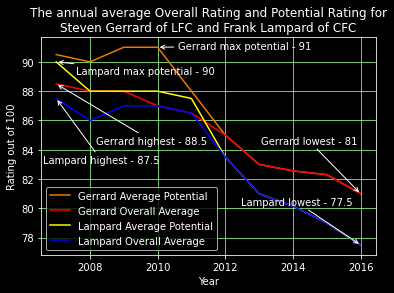

In [28]:
with plt.style.context('dark_background'):


    fig, ax = plt.subplots()

    title = ax.set_title("\n".join(wrap("The annual average Overall Rating and Potential Rating for Steven Gerrard of LFC and Frank Lampard of CFC", 60)))

    gerrard_avg.plot(y=['potential', 'overall_rating'], ax=ax, color=('#EB7900', 'red'), use_index=True)

    lampard_avg.plot(y=['potential', 'overall_rating'], ax=ax, color=('yellow', 'blue'), use_index=True).grid(b=True, which='both', axis='both', color='#8EF785')
    ax.legend(['Gerrard Average Potential', 'Gerrard Overall Average', 'Lampard Average Potential', 'Lampard Overall Average'])

    ax.annotate('Gerrard max potential - 91',
               xy=(2010, 91), xycoords='data',
                xytext=(20, -2), textcoords='offset points',
               arrowprops=dict(arrowstyle="->"))
    ax.annotate('Lampard max potential - 90',
               xy=(2007, 90), xycoords='data',
                xytext=(20, -12), textcoords='offset points',
               arrowprops=dict(arrowstyle="->"))
    ax.annotate('Gerrard lowest - 81',
               xy=(2016, 81), xycoords='data',
                xytext=(-100, 50), textcoords='offset points',
               arrowprops=dict(arrowstyle="->"))
    ax.annotate('Lampard lowest - 77.5',
               xy=(2016, 77.5), xycoords='data',
                xytext=(-120, 40), textcoords='offset points',
               arrowprops=dict(arrowstyle="->"))
    ax.annotate('Gerrard highest - 88.5',
               xy=(2007, 88.5), xycoords='data',
                xytext=(40, -60), textcoords='offset points',
               arrowprops=dict(arrowstyle="->"))
    ax.annotate('Lampard highest - 87.5',
               xy=(2007, 87.5), xycoords='data',
                xytext=(-13, -65), textcoords='offset points',
               arrowprops=dict(arrowstyle="->"))
    ax.set_xlabel('Year')
    ax.set_ylabel('Rating out of 100')

    plt.show()

Well, FIFA rated Gerrard equal to or higher than Lampard on average for every year provided in the database. Again, similar to the evaluation of a teams success based on wins alone, this does not definitively prove that Gerrard is a better midfielder than Lampard. This type of information cannot accurately account for intangible factors. A player's harmony with their teammates or a player's leadership traits(or lack thereof) may make a significant impact on their squadmates performance. Not to mention that in football a player depends upon the other 10 men on the field tremenduously. Yes, one player can make a difference at times. Individual magic does happen. However, it is often a team effort which can impact the way a player performs and is therefore evaluated for these type of ratings. 

That being said, while Liverpool fans cannot hang their hats on a great team performance from 2007-2016, they can continue to sing loudly about their legendary captain Steven Gerrard. 

<a id='conclusions'></a>
## Conclusions



There you have it. Two questions asked and answered. However, as mentioned in some of the brief analytical commentary, these two questions cannot capture the full nature of any team or individual player's performance. Here are the results can draw from this data.

#### Results: 

<ul>The team analysis demonstrated this information amongst other observable details.
    <li>As stated above, Liverpool failed to reach 19 or more wins in 6/8 seasons and only once exceeded the 26 win mark, something Chelsea managed twice and United 4 times during the same period.</li>
    <li>Liverpool, while much performing worse during this stretch than Chelsea or United, did not have the lowest number of games won in a season. Chelsea earned that mark with 12 wins in the 2015/16, the second season following Lampard's Chelsea retirement.</li>
    <li>Manchester United was the best performing team of this time period.
        <ol>
            <li>They had 19 or more wins in all 8 seasons</li>
            <li>They had 26 or more wins in 4/8 seasons</li>
            <li>They won the league 3 times during this timeframe(though this is simply a researched fact, not information which this data provided</li>
        </ol>
    </li>
    <li>As a side note, wins alone do not always capture you the title. For instance, Manchester United won the league in both 08/09 and 10/11, but won 5 matches less in 10/11! That is a 10-15 point difference which would have potentially lost them the title in other years. However, the entire league was performing differently that season and a lower number of wins was sufficient for victory. 
</ul>
<ol>The player data provided these observations:
    <li>FIFA's data indicates that Gerarrd was the better overall player during this timeframe, but a substantial decline can also be seen in both player, as they were both in the twilight of the careers</li>
    <li>A sub-question posed was whether Gerrard's performance could be linked to Liverpool's stumbles during the same time period. The two datasets do not overlap in a friendly manner concerning season performance values, but a visual inspection can show us that Gerrard's best rating also came with Liverpool's second best number of wins, but then he was also rated around 6 points lower when LFC had their best season during that timeframe! Again, there is no direct correlation between the two datasets, but it could be argued that Gerrard's declining physical abilities definintely did not help Liverpool, even if his more intangible qualities may have been vital to the team chemistry.</li>
    <li>The same goes for Lampard. No direct correlation can be drawn, but Chelsea performed more poorly leading up to Lampard's retirement in 2013/14. Then immediately after his departure they won the league in 2014/15!</li>
</ol>
    

#### Limitations:

As previously discussed, there are many, many factors beyond FIFA ratings and team records alone which determine a team and/or players success. Two very important factors, which are not even remotely touched upon in this database, are: 
<ul>
    <li>Number of other competitions/matches played</li>
    <li>Level of financial investment</li>
</ul>
<ol>
    <li><em>Other Competionts</em>: The top English clubs(and other nations as well) do not only compete for the League title. They also play in two domestic cups, one european tournament, and some smaller tournaments or individual championships. Their season is may be upwards of 50 matches, more if they are successful in some of the other competitions. Subsequently, fatigue and injury often play a tremenduous role in whether a team is successful. </li>
    <li><em>Financial Investment</em>: Financial investment is the other elephant in the room when it comes to team performance, and sometimes player, performance. At the end of the day, sports are a business. Without consistent financial investment to bring in talented players, teams will not always be able to compete with their rivals who are "splashing cash" on the next legendary midfielder. UEFA's <a href="https://www.uefa.com/insideuefa/protecting-the-game/financial-fair-play/">Financial Fair Play Regulations</a> try to keep investment balanced, but some clubs will always spend more money than others. Their investments may not always payoff, but the opportunities to obtain top level talent are not evenly spread amongst every league/nation, let alone every club in that nation.</li>
</ol>

To summarize, neither Liverpool nor Steven Gerrard performed well consistently during this timeperiod of this database(and neither did Lampard). Liverpool had only two seasons where they won more than half their games and Steven Gerrard's performance decreased almost annually leading up to his retirement in 2016 at the age of 36. However, sports are not static. Remarkable players and teams will come and go, so there will always be anticipation and anxiety over whether the next season will be outstanding or one to forget. 

<br><div align="center">Regardless of the results, all you Reds know how to walk on!</div></br> 

<div align="center">
    <em><br>When you walk through a storm</br>
    <br>Hold your head up high</br>
    <br>And don't be afraid of the dark</br>
    <br></br>
    <br>At the end of a storm</br>
    <br>There's a golden sky</br>
    <br>And the sweet silver song of a lark</br>
    <br></br>
    <br>Walk on through the wind</br>
    <br>Walk on through the rain</br>
    <br>Though your dreams be tossed and blown</br>
    <br></br>
    <br>Walk on, walk on</br>
    <br>With hope in your heart</br>
    <br>And you'll never walk alone</br></em>
    </div>

<img src="liverpool-fc.jpg"
alt="Liverpool Logo"
width="200px" height="200px" style="float"/>

<div align="center" style="font-size:11px">
        <a href="https://en.wikipedia.org/wiki/You%27ll_Never_Walk_Alone#Liverpool_F.C.">You'll Never Walk Alone - Gerry and the Peacemarkers ~ 1963</a>
</div>

# A Brief Works Cited
A number of resources were used in the creation of this report:
<ol>
    <li>Wikipedia was the primary resource for any Liverpool or other football related information, thought a lot of it was common knowledge to the writer.</li>
    <li>A lot of time was spent on the matplotlib and pandas documentation webpages. New functions were used to analyze the data in an attempt to answer the questions posed. Additionally, it as nice to read about the broader functionality of some functions which were covered a little too quickly in the course. </li>
    <li>Even more time was spent on stackoverflow reading about other users difficulties with functions, pandas, and matplotlib. The amount of trial and error necessary to properly utilize functions with each unique dataset is sometimes frustrating, but very rewarding in the end. Here are two examples of resources which helped the creation of this project.
        <ol>
            <li><a href="https://stackoverflow.com/questions/39941321/create-dataframe-from-multiple-series">A great quick reminder of pd.concat with series</a></li>
            <li><a href="https://queirozf.com/entries/pandas-dataframe-groupby-examples">Not from stackoverflow, but this website was also helpful in further understanding groupby</a></li>
            <li>Numerous other stackoverflow pages were consulted, but were not individually captured. This is something which should be better organized in future projects for better references and catologing of resources utilzed.</li>
        </ol>
    <li>This website <a href="https://pbpython.com/pandas-crosstab.html">Pandas Crosstab Explained</a> to be very useful.</li>
    <li>Seaborn was imported, but never used. Matplotlib was a source of frustration for a long time, so seaborn was neglected. Hopefully it will be incorporated in later assignments and future work!</li>
</ol>